<a href="https://colab.research.google.com/github/soltiste/ii-in-economi/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите файл classification.csv. В нем записаны истинные классы
объектов выборки (колонка true) и ответы некоторого классификатора
 (колонка predicted).
2. Заполните таблицу ошибок классификации:

-------------------------------Actual Positive--Actual Negative----------------

Predicted Positive--TP----------------------FP------------------------------------

Predicted Negative-FN---------------------TN------------------------------------

Для этого подсчитайте величины TP, FP, FN и TN согласно их
определениям. Например, FP — это количество объектов, имеющих
класс 0, но отнесенных алгоритмом к классу 1. Ответ в данном
вопросе — четыре числа через пробел.
3. Посчитайте основные метрики качества классификатора:

• Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score

• Precision (точность) — sklearn.metrics.precision_score

• Recall (полнота) — sklearn.metrics.recall_score

• F-мера — sklearn.metrics.f1_score
4. Имеется четыре обученных классификатора. В файле scores.csv записаны
истинные классы и значения степени принадлежности положительному классу для
каждого классификатора на некоторой
выборке:
• для логистической регрессии — вероятность положительного
класса (колонка score_logreg),
• для SVM — отступ от разделяющей поверхности (колонка score_svm),
2
• для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
• для решающего дерева — доля положительных объектов в листе (колонка score_tree).
Загрузите этот файл.
5. Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики
AUC-ROC (укажите название столбца с ответами этого классификатора)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score.
6. Какой классификатор достигает наибольшей точности (Precision)
при полноте (Recall) не менее 70% (укажите название столбца с ответами этого классификатора)? Какое значение точности при этом
получается?
Чтобы получить ответ на этот вопрос, найдите все точки precisionrecall-кривой с помощью функции sklearn.metrics.precision_recall_curve.
Она возвращает три массива: precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, указанных в массиве
thresholds. Найдите максимальной значение точности среди тех записей,
для которых полнота не меньше, чем 0.7.
При необходимости округляйте ответ до двух знаков после запятой..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, roc_curve, roc_auc_score, precision_recall_curve

1. Загрузите classification.csv

In [2]:
df = pd.read_csv('/content/drive/MyDrive/classification.csv')
df.head(4)

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0


2. Заполните таблицу ошибок классификации

In [3]:
TP = len(df[((df['true'])&(df['pred'])) == 1])
TN = len(df[((df['true'])|(df['pred'])) == 0])
FP = len(df[(df['true'] == 0)&(df['pred'] == 1)])
FN = len(df[(df['true'] == 1)&(df['pred'] == 0)])
tab = pd.DataFrame([[TP, FP], [FN, TN]],
                   index=['pred pos', 'pred neg'],
                   columns=['act pos', 'act neg'])
tab

,act pos,act neg
pred pos,43,34
pred neg,59,64


3. Посчитайте основные метрики качества классификатора

In [4]:
accuracy_score_for_clf = accuracy_score(df['true'], df['pred'])
precision_score_for_clf = precision_score(df['true'], df['pred'])
recall_score_for_clf = recall_score(df['true'], df['pred'])
f1_score_for_clf = f1_score(df['true'], df['pred'])
scores = pd.Series([accuracy_score_for_clf, precision_score_for_clf,
                    recall_score_for_clf, f1_score_for_clf],
                    index=['accuracy_score', 'precision_score',
                           'recall_score', 'f1_score'])
scores

accuracy_score     0.535000
precision_score    0.558442
recall_score       0.421569
f1_score           0.480447
dtype: float64

4. Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке: • для логистической регрессии — вероятность положительного класса (колонка score_logreg), • для SVM — отступ от разделяющей поверхности (колонка score_svm), 2 • для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn), • для решающего дерева — доля положительных объектов в листе (колонка score_tree). Загрузите этот файл.

In [5]:
df_s = pd.read_csv('/content/drive/MyDrive/scores.csv')
df_s.head(7)

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263
5,0,0.108506,-0.790864,0.000000,0.000000
6,0,0.413749,-0.185143,0.283053,0.363636


5.Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца с ответами этого классификатора)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score.

Построила ROC-кривую для линейной регрессии

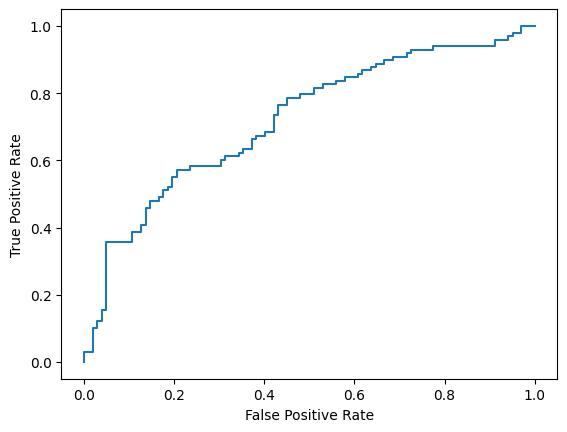

In [6]:
fpr, tpr, i = roc_curve(df_s['true'], df_s['score_logreg'])
plt.plot (fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
auc_scores = pd.Series([roc_auc_score(df_s['true'], df_s['score_logreg']),
                       roc_auc_score(df_s['true'], df_s['score_svm']),
                       roc_auc_score(df_s['true'], df_s['score_knn']),
                       roc_auc_score(df_s['true'], df_s['score_tree'])],
                       name='auc_score',
                       index=['logreg',
                              'svm',
                              'knn',
                              'tree'])
auc_scores

logreg    0.719188
svm       0.708683
knn       0.635154
tree      0.691927
Name: auc_score, dtype: float64

In [17]:
auc_scores_max = auc_scores.idxmax()
auc_scores_max

'logreg'

6. Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% (укажите название столбца с ответами этого классификатора)? Какое значение точности при этом получается? Чтобы получить ответ на этот вопрос, найдите все точки precisionrecall-кривой с помощью функции sklearn.metrics.precision_recall_curve. Она возвращает три массива: precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, указанных в массиве thresholds. Найдите максимальной значение точности среди тех записей, для которых полнота не меньше, чем 0.7. При необходимости округляйте ответ до двух знаков после запятой.

In [10]:
precision, recall, thresholds = precision_recall_curve(df_s['true'], df_s['score_logreg'])
prs_for_log = precision[recall >= 0.7].max()
prs_for_log

0.6302521008403361

In [11]:
precision, recall, thresholds = precision_recall_curve(df_s['true'], df_s['score_svm'])
prs_for_svm = precision[recall >= 0.7].max()
prs_for_svm

0.6228070175438597

In [12]:
precision, recall, thresholds = precision_recall_curve(df_s['true'], df_s['score_knn'])
prs_for_knn = precision[recall >= 0.7].max()
prs_for_knn

0.6065573770491803

In [13]:
precision, recall, thresholds = precision_recall_curve(df_s['true'], df_s['score_tree'])
prs_for_tree = precision[recall >= 0.7].max()
prs_for_tree

0.6517857142857143

In [15]:
why_is_max = pd.Series([prs_for_log, prs_for_svm, prs_for_knn, prs_for_tree],
                       index=['logreg', 'svm', 'knn', 'tree']).idxmax()
why_is_max

'tree'